**Bagging & Boosting KNN & Stacking**

**Question 1 :** What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

**Answer :**  The main idea of ensemble techniques is to combine several models to get a stronger and more accurate final model. Instead of depending on one model, ensembles use multiple weak learners and merge their predictions to improve performance and reduce errors.

Bagging (Bootstrap Aggregating):

Trains several models independently on different random samples of the data.

The final prediction is made by averaging (for regression) or voting (for classification).

Helps reduce variance and avoids overfitting.

Example: Random Forest.

Boosting:

Builds models sequentially, where each new model focuses on correcting the mistakes of the previous ones.

The final prediction is a weighted combination of all models.

Helps reduce bias and improve accuracy.

Example: AdaBoost, Gradient Boosting, XGBoost.

**Question 2:** Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

**Answer:** A single decision tree often overfits the training data because it tries to learn every detail, even noise.
The Random Forest Classifier reduces overfitting by building many decision trees on different random samples of the data and averaging their results. This combination smooths out extreme predictions from any single tree and improves generalization.

How it helps:

Each tree learns from a different part of the data.

Random subsets of features are used when splitting nodes, which makes trees less correlated.

The final prediction is based on majority voting, which lowers variance and improves accuracy.

Two key hyperparameters:

n_estimators: Number of trees in the forest. More trees generally improve stability but take longer to train.

max_features: Number of features considered when splitting a node. Controlling this helps reduce correlation between trees and prevents overfitting.


**Question 3:** What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Answer:** Stacking is an ensemble learning technique that combines predictions from multiple different models (like decision tree, SVM, logistic regression) using another model called a meta-learner. The base models make their predictions first, and then the meta-learner uses those predictions as input to make the final output.

How it differs from bagging and boosting:

Bagging (like Random Forest) uses many models of the same type trained on random subsets of data and averages their results to reduce variance.

Boosting (like AdaBoost or XGBoost) builds models one after another, where each new model focuses on correcting the mistakes of the previous ones.

Stacking, on the other hand, combines different types of models together and learns how to best mix their predictions. It focuses on improving overall performance rather than reducing variance or bias directly.

Example use case:
Suppose you are predicting whether a customer will buy a product.
You can use logistic regression, random forest, and SVM as base models, and then use another model like linear regression or another classifier as the meta-learner. The final prediction will be based on how the meta-model combines the strengths of all three models.

**Question 4:**  What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

**Answer :** OOB Score stands for Out-of-Bag Score. It is a built-in way to check the performance of a Random Forest model without using a separate validation set.

When building a Random Forest, each decision tree is trained on a random subset of the data (using bootstrapping). This means some data points are left out while training each tree — these are called Out-of-Bag (OOB) samples.

After the model is trained, each OOB sample is tested using only the trees that did not see it during training. The average accuracy (or error) from these predictions gives the OOB Score.

Why it is useful:

It provides an unbiased estimate of the model’s performance.

It removes the need for a separate validation or test set, which helps when data is limited.

It gives a quick idea of how well the model is generalizing to unseen data.


**Question 5**: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

**Answer :** AdaBoost and Gradient Boosting are both boosting methods, but they handle errors and update models in different ways.

1. Handling errors:

  - AdaBoost focuses more on the samples that were misclassified by previous weak learners. It gives higher weight to those wrong samples so the next learner can pay more attention to them.

  - Gradient Boosting focuses on reducing the overall error (residual) of the model by fitting the next learner to the remaining errors from the previous ones.

2. Weight adjustment:

  - AdaBoost adjusts the weights of each training sample after every iteration. Correct predictions get lower weights, and wrong ones get higher weights.

  - Gradient Boosting does not change sample weights. Instead, it updates the model based on the gradient of the loss function, improving it step by step.

3. Typical use cases:

  - AdaBoost is often used for simpler, cleaner datasets and classification problems like spam detection or face recognition.

 - Gradient Boosting works well for complex, large datasets and both classification and regression problems such as credit scoring or sales prediction.

 **Question 6:** Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

 **Answer:** CatBoost performs well on categorical features because it can handle them directly without needing one-hot encoding or label encoding.

It uses a method called “ordered encoding” or “target statistics”, where each category is converted into a number based on how that category relates to the target variable. Instead of using the full dataset at once, CatBoost calculates these values in an ordered way to avoid data leakage.

This approach helps the model understand the importance of each category naturally, keeps training fast, and reduces overfitting.



In [4]:
""" Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions """

# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
data = load_wine()
X = data.data
y = data.target

# 2. Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train KNN (default K=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler and retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\nWith Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# 5. Use GridSearchCV to find best K and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("\nBest Parameters from GridSearchCV:", grid.best_params_)

# 6. Train optimized KNN and compare results
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\nOptimized KNN Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized KNN Classification Report:\n", classification_report(y_test, y_pred_best))


Without Scaling:
Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


With Scaling:
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Best Parameters from GridSearchCV: {'metric': 'manhattan', 'n_neighbors': 1}

Optimized KNN Accurac

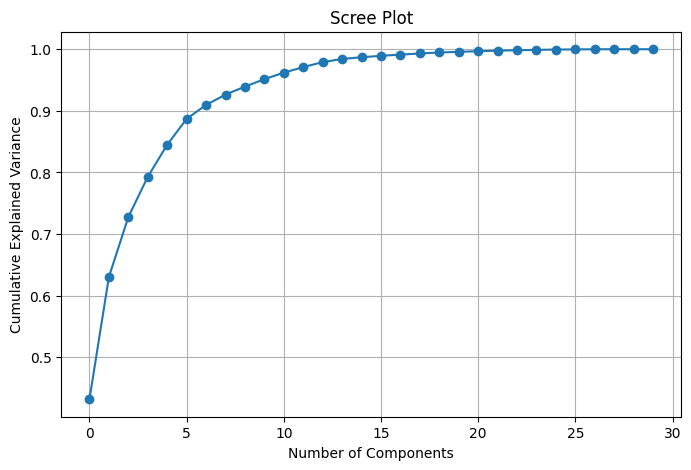

Number of components to retain 95% variance: 10

Accuracy on original data: 0.9590643274853801
Accuracy on PCA-transformed data: 0.9649122807017544


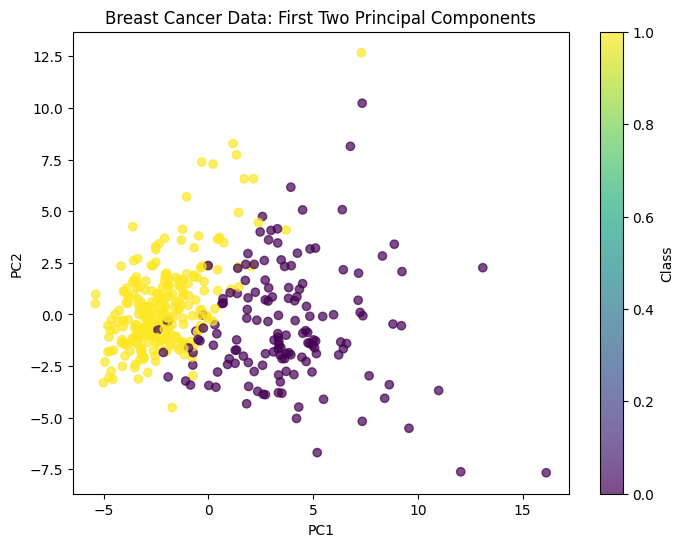

In [5]:
""" Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class). """

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Apply PCA and plot scree plot
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)
print("Number of components to retain 95% variance:", X_train_pca.shape[1])

# 4. Train KNN on original and PCA-transformed data
# Original data
knn_original = KNeighborsClassifier()
knn_original.fit(X_train_scaled, y_train)
y_pred_orig = knn_original.predict(X_test_scaled)
acc_orig = accuracy_score(y_test, y_pred_orig)

# PCA-transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\nAccuracy on original data:", acc_orig)
print("Accuracy on PCA-transformed data:", acc_pca)

# 5. Visualize first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Breast Cancer Data: First Two Principal Components")
plt.colorbar(label="Class")
plt.show()


MSE (Euclidean, K=5): 4837.036252300671
MSE (Manhattan, K=5): 5428.5875285091715


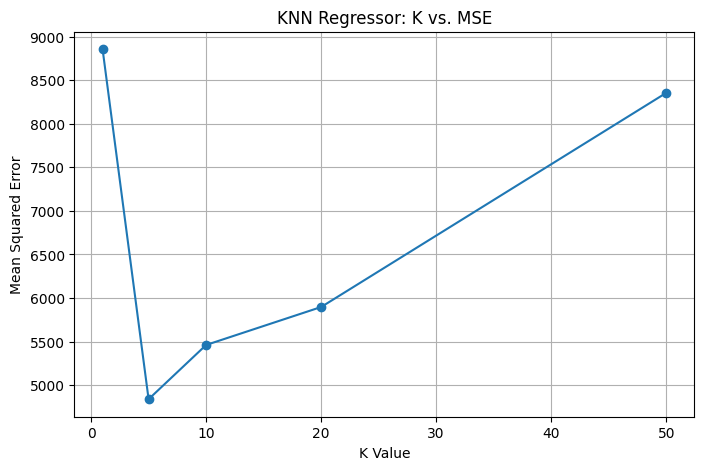

In [6]:
""" Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff. """

# Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN regressor with different distance metrics (K=5)
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train_scaled, y_train)
y_pred_euc = knn_euc.predict(X_test_scaled)
mse_euc = mean_squared_error(y_test, y_pred_euc)

knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train_scaled, y_train)
y_pred_man = knn_man.predict(X_test_scaled)
mse_man = mean_squared_error(y_test, y_pred_man)

print("MSE (Euclidean, K=5):", mse_euc)
print("MSE (Manhattan, K=5):", mse_man)

# 3. Test different K values and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_list.append(mean_squared_error(y_test, y_pred))

# Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("KNN Regressor: K vs. MSE")
plt.grid(True)
plt.show()


brute: Accuracy = 0.7143, Training Time = 0.0013 sec
kd_tree: Accuracy = 0.7143, Training Time = 0.0018 sec
ball_tree: Accuracy = 0.7143, Training Time = 0.0019 sec

Best algorithm: brute


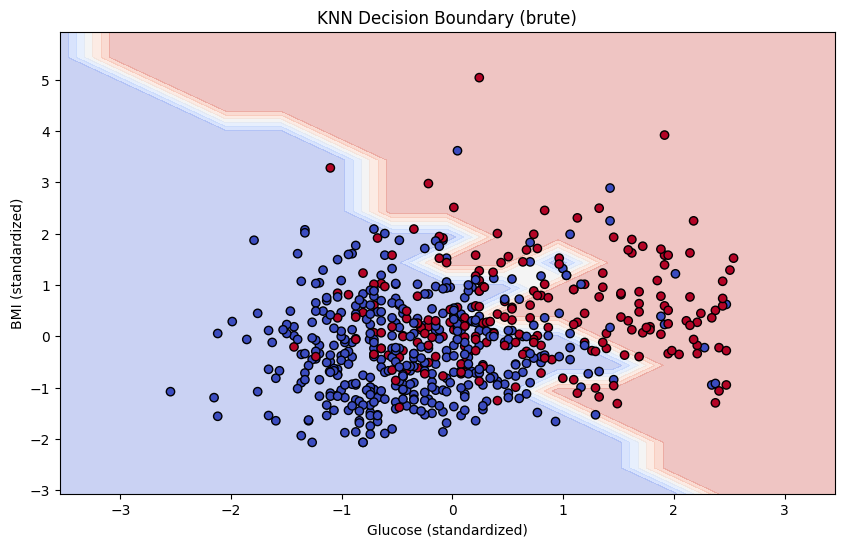

In [8]:
""" Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features). """

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Pima Indians Diabetes dataset
# Dataset URL: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
# Columns based on dataset description
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
                 names=columns)

# Step 3: Replace zeros in some columns with NaN (these are considered missing)
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Step 4: KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 5: Split dataset
X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]

# Standardize features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train KNN with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[algo] = {"accuracy": accuracy, "training_time": end_time - start_time}

# Step 7: Print results
for algo in results:
    print(f"{algo}: Accuracy = {results[algo]['accuracy']:.4f}, Training Time = {results[algo]['training_time']:.4f} sec")

# Step 8: Plot decision boundary for best-performing method
best_algo = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest algorithm: {best_algo}")

# Use the two most important features (let's pick Glucose and BMI as commonly important features)
X_plot = X_train[:, [1, 5]]  # Glucose=1, BMI=5
X_test_plot = X_test[:, [1, 5]]

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_plot, y_train)

# Decision boundary plot
h = 0.5  # step size
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.title(f"KNN Decision Boundary ({best_algo})")
plt.show()

